# 第五次作业
### 姓名：张家琪
### 班级：2020211601
### 学号：2020211178

# 作业内容

## （1）选取一张对比度不明显的彩色图像，将其转换为灰度图像

Text(0.5, 1.0, 'graylevel img')

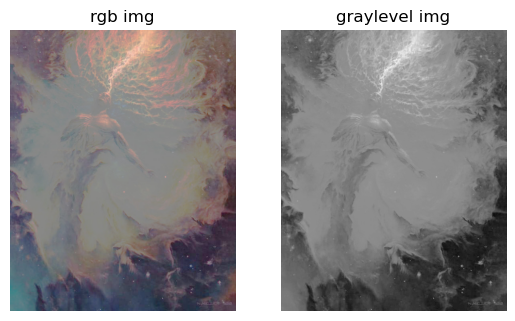

In [1]:
from skimage import io, data,exposure
import matplotlib.pyplot as plt
%matplotlib inline

img=io.imread("pic.jpg")
img_gray=io.imread("pic_gray.jpg",as_gray=True)

plt.subplot(121)
plt.imshow(img)  #展示彩色图像
plt.axis("off")
plt.title("rgb img")
plt.subplot(122)
plt.imshow(img_gray,plt.cm.gray)  #展示灰度图像，图像在ps中转换为灰度图像
plt.axis("off")
plt.title("graylevel img")

## （2）编写PYTHON代码实现灰度图像的直方图均衡，比较均衡前后的效果

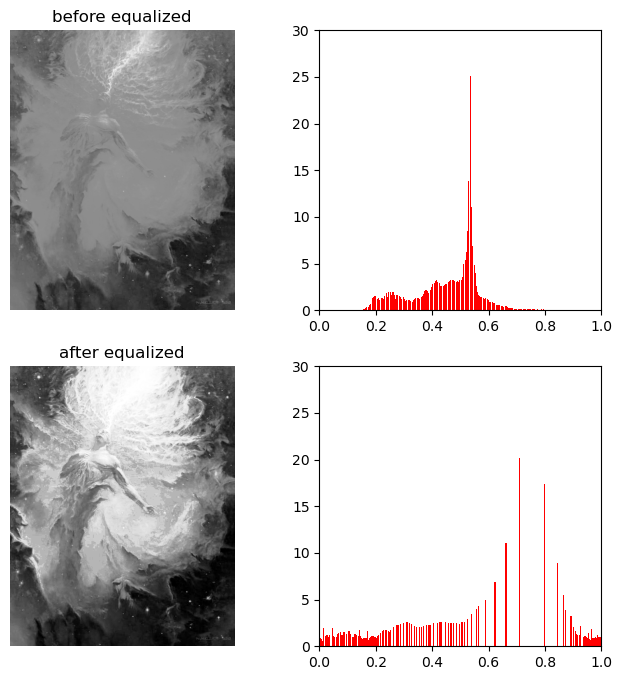

In [2]:
# 使用skimage封装好的函数均衡直方图

from skimage import io, data,exposure
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure("hist",figsize=(8,8))

arr=img_gray.flatten()
plt.subplot(221)
plt.imshow(img_gray,plt.cm.gray)  #原始图像
plt.axis("off")
plt.title("before equalized")
plt.subplot(222)
plt.hist(arr, bins=256, density=True, edgecolor='None',facecolor='red') #原始图像直方图
plt.xlim(0,1)
plt.ylim(0,30)

img_2=exposure.equalize_hist(img_gray)
arr_2=img_2.flatten()
plt.subplot(223)
plt.imshow(img_2,plt.cm.gray)  #均衡化图像
plt.axis("off")
plt.title("after equalized")
plt.subplot(224)
plt.hist(arr_2, bins=256, density=True, edgecolor='None',facecolor='red') #均衡化直方图
plt.xlim(0,1)
plt.ylim(0,30)

plt.show()

(0.0, 0.1)

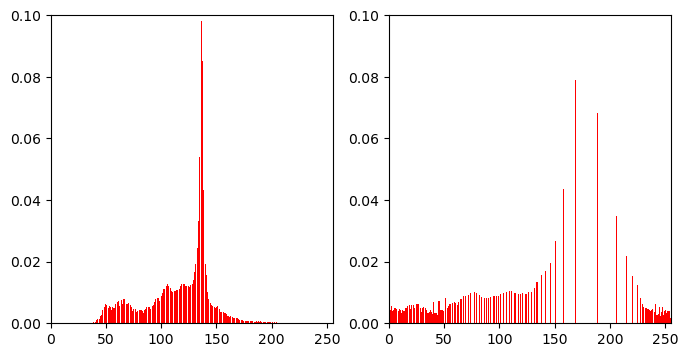

In [3]:
# 参考https://en.wikipedia.org/wiki/Histogram_equalization手动编写的均衡直方图方法

import numpy as np

# 读取灰度图像，转换为(0,255)的灰度值
arr=img_gray.flatten()
for i in range(arr.shape[0]):
    arr[i]=round(arr[i]*255)

# 计算灰度图像中各灰度值出现的次数
count=np.zeros(256)
for item in arr:
    count[int(item)]+=1

# 使用累积分布函数（Cumulative distribution function, CDF)方法
cdf=np.zeros(256)
for i in range(count.shape[0]):
    for j in range(0,i):
        if count[i]!=0 and count[j]!=0:
            cdf[i]+=count[j]

# 将cdf()后的数值均衡到(0,255)的区间
arr_2=np.zeros(arr.shape[0])
for i in range(arr.shape[0]):
    temp=(cdf[int(arr[i])]-1)/arr.shape[0]
    arr_2[i]=round(temp*255)

# 绘制均匀前后的直方图图像
plt.figure("hist",figsize=(8,4))
plt.subplot(121)
plt.hist(arr, bins=256, density=True, edgecolor='None',facecolor='red') #原始图像直方图
plt.xlim(0,255)
plt.ylim(0,0.1)
plt.subplot(122)
plt.hist(arr_2, bins=256, density=True, edgecolor='None',facecolor='red') #原始图像直方图
plt.xlim(0,255)
plt.ylim(0,0.1)

## （3）查阅有关文档，了解彩色直方图均衡的常用方法，选取一种方法进行实现，与PHOTOSHOP的效果进行对比。

(-0.5, 563.5, 703.5, -0.5)

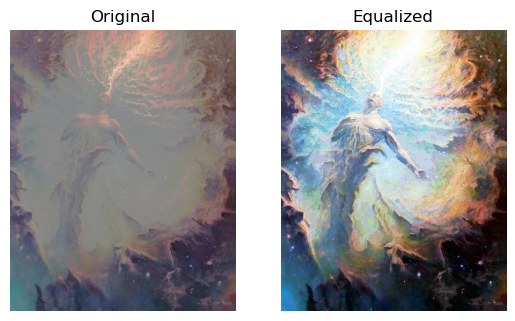

In [4]:
# 继续使用“手动均匀”中同样的方法，不过是均匀三通道的rgb图像

from skimage import io,img_as_float,color
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(121)
plt.imshow(img)
plt.title("Original")
plt.axis('off')
height = img.shape[0]
width  = img.shape[1]

count_b = np.zeros(256, float) # 因为是概率, 有可能是浮点数
count_g = np.zeros(256, float)
count_r = np.zeros(256, float)


# 统计像素个数并计算概率
for i in range(height):
    for j in range(width):
        (b, g, r) = img[i, j]

        index_b = int(b)
        index_g = int(g)
        index_r = int(r)

        count_b[index_b] = count_b[int(b)] + 1
        count_g[index_g] = count_g[int(g)] + 1
        count_r[index_r] = count_r[int(r)] + 1

total = height * width # 总像素个数
count_b =  count_b / total  # 计算概率
count_g =  count_g / total
count_r =  count_r / total

# 计算累计概率
sum_b = sum_g = sum_r = float(0)
for i in range(256):
    sum_b += count_b[i]
    count_b[i] = sum_b # 计算出累积概率

    sum_g += count_g[i]
    count_g[i] = sum_g

    sum_r += count_r[i]
    count_r[i] = sum_r

# 计算映射表
mapl_b = np.uint16(255 * count_b)
mapl_g = np.uint16(255 * count_g)
mapl_r = np.uint16(255 * count_r)

# 将图像进行映射
dst = np.zeros((height, width, 3), np.uint8)
for i in range(height):
    for j in range(width):
        (b, g, r) = img[i, j]
        b = mapl_b[b]
        g = mapl_g[g]
        r = mapl_r[r]

        dst[i, j] = (b, g, r)

plt.subplot(122)
plt.imshow(dst)
plt.title("Equalized")
plt.axis('off')

对比ps中“图像-调整-色调均化”后的图片

(0.0, 0.1)

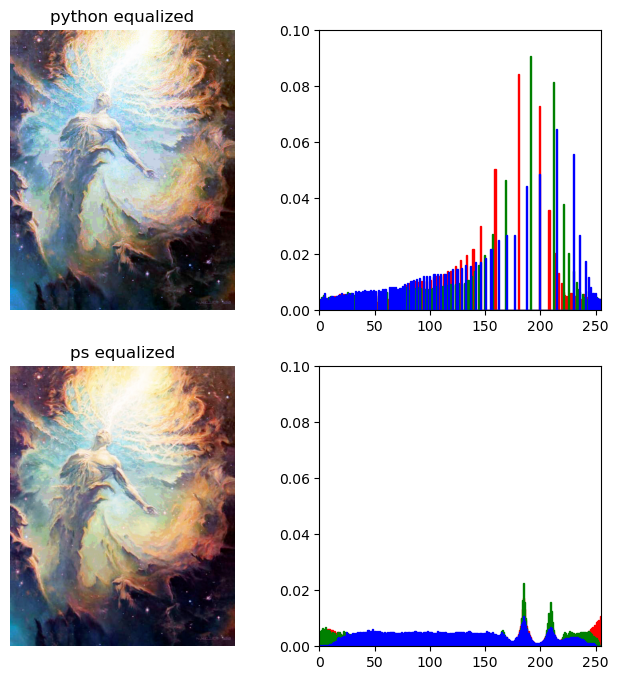

In [5]:
img_ps=io.imread("pic_ps_equalized.jpg")
plt.figure("hist",figsize=(8,8))

plt.subplot(221)
plt.imshow(dst)  # 代码均化直方图的图像
plt.axis("off")
plt.title("python equalized")
plt.subplot(222)
ar=dst[:,:,0].flatten()
plt.hist(ar, bins=256, density=True, facecolor='r',edgecolor='r')
ag=dst[:,:,1].flatten()
plt.hist(ag, bins=256, density=True, facecolor='g',edgecolor='g')
ab=dst[:,:,2].flatten()
plt.hist(ab, bins=256, density=True, facecolor='b',edgecolor='b')
plt.xlim(0,255)
plt.ylim(0,0.1)

plt.subplot(223)
plt.imshow(img_ps)  # PS均化直方图的图像
plt.axis("off")
plt.title("ps equalized")
plt.subplot(224)
ar=img_ps[:,:,0].flatten()
plt.hist(ar, bins=256, density=True, facecolor='r',edgecolor='r')
ag=img_ps[:,:,1].flatten()
plt.hist(ag, bins=256, density=True, facecolor='g',edgecolor='g')
ab=img_ps[:,:,2].flatten()
plt.hist(ab, bins=256, density=True, facecolor='b',edgecolor='b')
plt.xlim(0,255)
plt.ylim(0,0.1)

可以看到两张图有很明显的色调不一致的地方，代码均化的图片蓝色会更明显，而ps均化的图像较原图更贴合。这是因为对RGB图像的红色、绿色和蓝色分量应用相同的方法可能会导致图像的颜色平衡发生变化，各通道的相对分布不同了。

## （4）阅读"Exact Hitogram Specification"第二部分和第三部分，写出精确直方图均衡的算法原理。如果有兴趣可以对算法进行实现，给出实现均衡效果。

我个人对精确直方图均衡（Exact Hitogram Specification）的算法原理理解如下，为方便表述，我将此方法简写为EHS：


假设一张$m\times n$像素大小的灰度图像拥有$L$个离散灰度值（discrete intensity levels）（也就是其灰度值在$(0,L-1)$之间），其中灰度为$j$的像素有$h(j)$个。实现EHS方法的前提条件，是这张灰度图像应当是非归一化（unnormalized）、有效的（valid），也就是说它满足：
$$
\sum\limits_{j=0}^{L-1}h(j)=MN
$$

在满足这一条件下，EHS包括三个基本步骤：
\
a、 根据预定义标准（predefined criterion）对像素进行排序。
\
b、 将有序像素拆分为$L$组，使组$j$具有$h(j)$个像素。
\
c、 将灰度值$j$指定给$j$组中的所有像素
\
其中最关键的就是如何指定预定义标准，让像素合理地排列、划分。

我们首先能想到的方法是让灰度值按照自然数顺序排列，但这有一个问题，就是一般情况下$L<MN$，一个灰度值可能对应多个像素点，它们需要被均匀开，而不是划分到一个组里。因此，EHS提出了这样一种排列方法。首先，对于一个位置为$(x,y)$的像素点，设置一组以$(x,y)$为中心的、数量为$K$的领域$W_i\{i=1,2,\cdots,K\}$，这些领域“一环套一环”,也就是：
$$
W_1 \subset W_2 \subset \ldots \subset W_K
$$
对于每个$W_i$，计算$W_i$中所有像素点的平均灰度值$a_k(x,y)$。对于像素点$(x,y)$，计算一组数量为$K$的平均灰度值：
$$
A(x,y)=[a_1(x,y),a_2(x,y),\cdots,a_k(x,y)]
$$

因此，一张$m\times n$像素大小的灰度图像应当有$MN$个$A(x,y)$，而每个$A(x,y)$里有$K$个元组来描述不同领域大小的平均灰度值。回到排列这一核心问题，我们仍然需要一个方法来排列这些$M\times N\times K$个的元组。EHS的方法参考了字典排序。举个例子，对于两个像素点$(t,v)$和$(w,z)$，比较$A(t,v)$和$A(w,z)$，如果$a_i(t,v)$和$a_i(w,z)(i=1,2,\cdots,j-1)$都相等，但是$a_j(t,v)>a_j(w,z)$，那么$(t,v)$就排在$(w,z)$前面。又来了一个$(o,p)$，同样前面都一样，比较到后面发现$a_k(w,z)>a_k(o,p)(k>j)$，那么$(o,p)$就要排在$(w,z)$后面。这里，邻域$a_i=1,2,\cdots,i,j,k,\cdots$的涵盖像素数量依次变小。

我们可以用过滤器内核（filter kernel）设置邻域，计算平均值，EHS中给出了六个filter kernel的例子：
$$
\eqalignno{ \phi_1&=[1]\quad \phi_2={1\over 5}\left[\matrix{ 0 & 1 & 0\cr 1 & 1 & 1\cr 0 & 1 & 0 } \right]\quad \phi_3={1\over 9}\left[\matrix{ 1 & 1 & 1\cr 1 & 1 & 1\cr 1 & 1 & 1 } \right]\cr \phi_4&={1\over 13} \left[\matrix{ 0 & 0 & 1 & 0 & 0\cr 0 & 1 & 1 & 1 & 0\cr 1 & 1 & 1 & 1 & 1\cr 0 & 1 & 1 & 1 & 0\cr 0 & 0 & 1 & 0 & 0 } \right]\cr \phi_5&={1\over 21}\left[\matrix{ 0 & 1 & 1 & 1 & 0\cr 1 & 1 & 1 & 1 & 1\cr 1 & 1 & 1 & 1 & 1\cr 1 & 1 & 1 & 1 & 1\cr 0 & 1 & 1 & 1 & 0 } \right]\cr \phi_6&={1\over 25}\left[\matrix{ 1 & 1 & 1 & 1 & 1\cr 1 & 1 & 1 & 1 & 1\cr 1 & 1 & 1 & 1 & 1\cr 1 & 1 & 1 & 1 & 1\cr 1 & 1 & 1 & 1 & 1 } \right]. }
$$

在后面的内容我就没有看了。

代码部分，我在github上找到了一个可以运行的EHS方法代码，地址为：https://github.com/StefanoD/ExactHistogramSpecification

In [9]:
import imageio
from histogram_matching import ExactHistogramMatcher

def histogram_matching_rgb(im_target,im_refer):
    target_img = imageio.imread(im_target)
    reference_img = imageio.imread(im_refer)

    reference_histogram = ExactHistogramMatcher.get_histogram(reference_img)
    new_target_img = ExactHistogramMatcher.match_image_to_histogram(target_img, reference_histogram)
    imageio.imsave('rgb_out.png', new_target_img)

/tmp/ipykernel_87/2441164208.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  target_img = imageio.imread(im_target)
/tmp/ipykernel_87/2441164208.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  reference_img = imageio.imread(im_refer)
Lossy conversion from float64 to uint8. Range [0.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


Text(0.5, 1.0, 'EHS img')

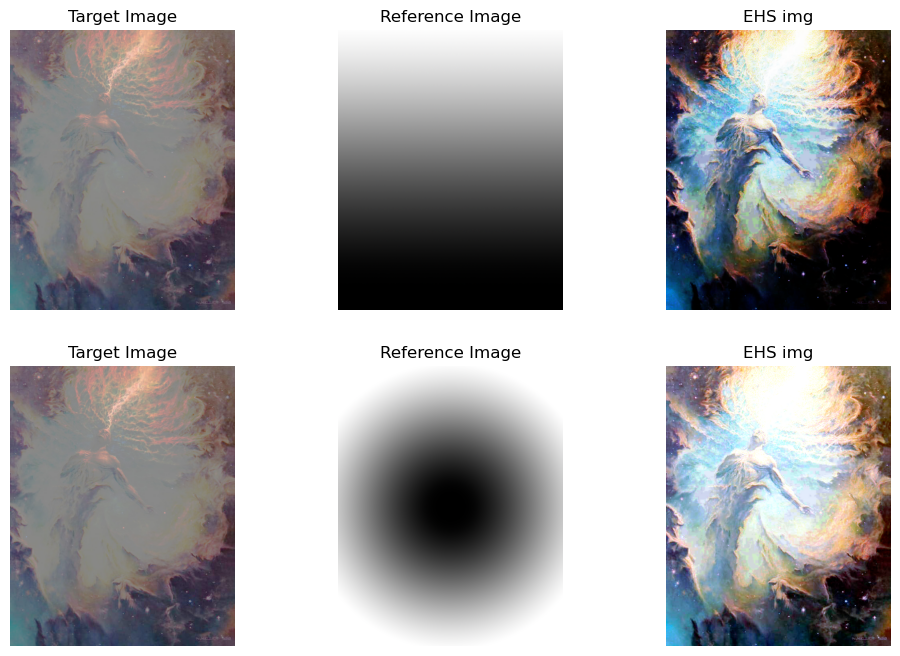

In [10]:
# 展示EHS方法结果

histogram_matching_rgb("pic.jpg","pic_reference.png")

img_1=io.imread("pic.jpg")
img_2=io.imread("pic_reference.png")
img_3=io.imread("rgb_out.png")

plt.figure(figsize=(12,8))
plt.subplot(231)
plt.imshow(img_1)  # 原始图像
plt.axis("off")
plt.title("Target Image")
plt.subplot(232)
plt.imshow(img_2)  # 参考图像1
plt.axis("off")
plt.title("Reference Image")
plt.subplot(233)
plt.imshow(img_3)  # EMS后图像
plt.axis("off")
plt.title("EHS img")

histogram_matching_rgb("pic.jpg","pic_reference2.png")

img_1=io.imread("pic.jpg")
img_2=io.imread("pic_reference2.png")
img_3=io.imread("rgb_out.png")

plt.subplot(234)
plt.imshow(img_1)  # 原始图像
plt.axis("off")
plt.title("Target Image")
plt.subplot(235)
plt.imshow(img_2)  # 参考图像2
plt.axis("off")
plt.title("Reference Image")
plt.subplot(236)
plt.imshow(img_3)  # EMS后图像
plt.axis("off")
plt.title("EHS img")